**UNDERSTANDING ELECTRIC CAR USAGE OVER TIME IN A ELECTRIC CAR- SHARING AUTOLIB**

**OBJECTIVES**

1. Importing libraries e.g. pandas, numpy 
2. Uploading the dataset
3. Assesing the dataset
4. Data cleaning to restore integrity i.e.
        Validity
        Accuracy
        Completeness
        Consistency
        uniformity
5. Exporting to csv
6. Analysis



**ANALYSIS OBJECTIVES**

1. Find out the most popular hour for returning cars
2. Find out the overal most popular station
3. Find out the most popular station during the most popular picking hour
4. Find out which ppostal code is most popular for picking up blue cars
5. Find out which postal code the most popular station belongs i.e overal and during popular picking hours
6. Assessing results if utilib and utilib 1.4 are considered

1.**Importing libraries**

In [1]:
import pandas as pd
import numpy as np

2.**Uploading dataset**

http://bit.ly/autolib_dataset

In [2]:
url = 'http://bit.ly/autolib_dataset'
df = pd.read_csv(url, encoding= 'latin1')
df.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


3.**Assessing the dataset**

In [3]:
#Data Cleaning Action: checking for datatypes
#Explanation: Its important to know the data types so that necessary conversions are done
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

4.**Data Cleaning**

Validity

In [4]:
# Data Cleaning Action: Dropping columns
#Explanation:columns that will not be useful during this project. The address and public name column values are replicated in the ID column therfore there is no need of keeping them
df.drop(['Address', 'Displayed comment', 'Geo point', 'Scheduled at','Public name'], axis= 1, inplace= True)
df.head(5)



,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,3,station,ok,nonexistent,2018,4,8,17,23


In [5]:
# Data Cleaning Action: converting year,month,day, hour and minute column in datetime data type
#Explanation: it will yeild accurate time
import datetime
df1 =pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
df1

0      2018-04-08 11:43:00
1      2018-04-06 07:24:00
2      2018-04-03 20:14:00
3      2018-04-04 04:37:00
4      2018-04-08 17:23:00
               ...        
4995   2018-04-06 11:26:00
4996   2018-04-04 16:56:00
4997   2018-04-01 07:01:00
4998   2018-04-04 17:27:00
4999   2018-04-08 10:02:00
Length: 5000, dtype: datetime64[ns]

Accuracy

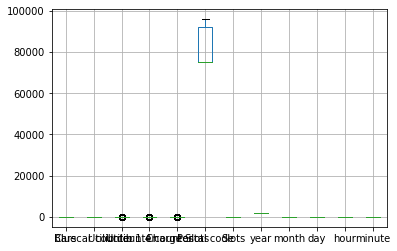

In [6]:
#Data Cleaning Action: assessing outliers
#Explanation: to draw out inconsistencies
df.boxplot()

Completeness

In [7]:
#Data Cleaning Action: checking for null values
#Explanation:
df.isnull().sum().sum()

0

In [9]:
#Data Cleaning Action: jioning dataframes
#Explanation: this will allow the prevous dataframe to include the datetime values essential to the analysis of data
df2 = pd.concat([df,df1], axis = 1)
df2.head()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,0
0,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00
1,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,operational,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00
2,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,operational,1,station,ok,nonexistent,2018,4,3,20,14,2018-04-03 20:14:00
3,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,operational,2,station,ok,nonexistent,2018,4,4,4,37,2018-04-04 04:37:00
4,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,3,station,ok,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00


Consistency

In [10]:
#Data Cleaning Action: Assessing for duplicated rows
#Explanation: there are no duplicates
df.duplicated().sum()


0

Uniformity

In [11]:
# Data Cleaning Action: Dropping columns
#Explanation: the columns are no longer needed in the analysis
df2.drop(['year', 'month', 'day', 'hour','minute'], axis= 1, inplace= True)
df2.head()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,0
0,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,nonexistent,2018-04-08 11:43:00
1,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,operational,0,station,ok,nonexistent,2018-04-06 07:24:00
2,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,operational,1,station,ok,nonexistent,2018-04-03 20:14:00
3,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,operational,2,station,ok,nonexistent,2018-04-04 04:37:00
4,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,3,station,ok,nonexistent,2018-04-08 17:23:00


In [12]:
# Data Cleaning Action: renaming the 0 column to datetime columns
#Explanation: it will be easier to retrive column when given a unique key
df2.columns =['Cars',	'Bluecar counter',	'Utilib counter',	'Utilib 1.4 counter', 'Charge Slots',	'Charging Status',	'City',	'ID',	'Kind',	'Postal code',	'Rental status', 'Slots',	'Station type',	'Status',	'Subscription status',	'datetime']
df2.head()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,datetime
0,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,nonexistent,2018-04-08 11:43:00
1,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,operational,0,station,ok,nonexistent,2018-04-06 07:24:00
2,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,operational,1,station,ok,nonexistent,2018-04-03 20:14:00
3,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,operational,2,station,ok,nonexistent,2018-04-04 04:37:00
4,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,3,station,ok,nonexistent,2018-04-08 17:23:00


In [16]:
# Data Cleaning Action: converting all column names to lower case
# Explanation: to ensure all columns are uniform
df2.columns = map(str.lower, df2.columns)
columns = ['Cars',	'Bluecar counter',	'Utilib counter',	'Utilib 1.4 counter', 'Charge Slots',	'Charging Status',	'City',	'ID',	'Kind',	'Postal code',	'Rental status', 'Slots',	'Station type',	'Status',	'Subscription status',	'datetime']
df2.columns = map(str.upper, df2.columns)
df2.columns = columns
df2.columns

Index(['Cars', 'Bluecar counter', 'Utilib counter', 'Utilib 1.4 counter',
       'Charge Slots', 'Charging Status', 'City', 'ID', 'Kind', 'Postal code',
       'Rental status', 'Slots', 'Station type', 'Status',
       'Subscription status', 'datetime'],
      dtype='object')

In [17]:
# Data Cleaning Action: Previwing the dataframe 
#Explanation: be fore exporting to csv, its important to check if the dataframed is well cleaned to deliver expected results during analysis
df2.head()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,datetime
0,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,nonexistent,2018-04-08 11:43:00
1,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,operational,0,station,ok,nonexistent,2018-04-06 07:24:00
2,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,operational,1,station,ok,nonexistent,2018-04-03 20:14:00
3,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,operational,2,station,ok,nonexistent,2018-04-04 04:37:00
4,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,3,station,ok,nonexistent,2018-04-08 17:23:00


5. **Exporting to csv**

In [18]:
# Data Cleaning Action: Exporting the cleaned dataframe to csv
#Explanation: this will help distingush between the edited copies
df2.to_csv('Autolib_dataset_edited')

6.**Analysis**

Importing the csv file

In [20]:
url1 = '/content/Autolib_dataset_edited'
df0 = pd.read_csv(url1)
df0.head()

,Unnamed: 0,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,datetime
0,0,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,nonexistent,2018-04-08 11:43:00
1,1,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,operational,0,station,ok,nonexistent,2018-04-06 07:24:00
2,2,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,operational,1,station,ok,nonexistent,2018-04-03 20:14:00
3,3,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,operational,2,station,ok,nonexistent,2018-04-04 04:37:00
4,4,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,3,station,ok,nonexistent,2018-04-08 17:23:00


1. Find out the most popular hour for returning cars


In [31]:
popular_hour_4returns = df0['Slots'].min()
dfp = df0[df0['Slots'] == popular_hour_4returns]
dfp.groupby(["Slots"])['datetime'].sum()


Slots
0    2018-04-06 07:24:002018-04-08 18:20:002018-04-...
Name: datetime, dtype: object

2. Find out the overal most popular station


In [34]:
#popular_hour_4returns = df0['Slots'].max()
#dfp = df0[df0['Slots'] == popular_hour_4returns]
#dfp.groupby(["Slots"])['ID'].sum()

df0['ID'].value_counts()

paris-portedemontrouge-8        13
paris-voltaire-182              11
sevres-wolfenbuttel-1           11
paris-mathis-35                 11
paris-grenelle31-parking        11
                                ..
argenteuil-bicheret-4            1
epinaysurseine-argenteuil-28     1
puteaux-degaulle-70              1
villejuif-jeanjaures-153         1
charentonlepont-jeanjaures-4     1
Name: ID, Length: 1105, dtype: int64

3. Find out the most popular station during the most popular picking hour


In [44]:
popular_hour_4returns = df0['Slots'].max()
dfp = df0[df0['Slots'] == popular_hour_4returns]
dfp1= dfp.groupby(["Slots"])['datetime'].sum()
dfp2 = dfp1.groupby(df0['ID'])
dfp2.sum()

ID
nanterre-luaps-17    2018-04-02 20:19:002018-04-06 08:21:002018-04-...
Name: datetime, dtype: object

4. Find out which postal code is most popular for picking up blue cars


In [47]:
popular_posta_4returns = df0['Bluecar counter'].max()
dfp = df0[df0['Bluecar counter'] == popular_hour_4returns]
dfp.groupby(["Bluecar counter"])['Postal code'].value_counts()


Bluecar counter  Postal code
7                92350          7
                 92000          4
                 75011          2
                 78000          2
                 78140          2
                 91330          2
                 92260          2
                 93100          2
                 94120          2
                 78150          1
                 91370          1
                 92140          1
                 92330          1
                 92600          1
                 92700          1
                 93150          1
                 93260          1
                 93600          1
                 93700          1
                 93800          1
                 94150          1
                 94300          1
                 94450          1
Name: Postal code, dtype: int64

5. Find out which postal code the most popular station belongs i.e overal and during popular picking hours


In [48]:
pop_station = df0[df0['ID'] == 'nanterre-luaps-17']
pop_station.groupby(['ID'])['Postal code'].value_counts()

ID                 Postal code
nanterre-luaps-17  92000          1
Name: Postal code, dtype: int64

6. Assessing results if utilib and utilib 1.4 are considered

In [62]:
popular_posta_3returns = df0['Utilib 1.4 counter'].max()
dft = df0[df0['Utilib 1.4 counter'] == popular_posta_3returns]
dft.groupby(['Utilib 1.4 counter'])['Postal code'].value_counts()

Utilib 1.4 counter  Postal code
3                   75015          1
                    92310          1
Name: Postal code, dtype: int64